<p><b><mark style = "background: #f6bfb3">Objective:</mark></b> Generate a Random Exponentially Decaying Graph with Noise. See if the program can recognize features from the graph.</p>


<h2><mark style = "background: #a1f5a5">Step 1:</mark> Create Random Exp. Decaying Graph</h2>

We use numpy.rand() to create the random graph.

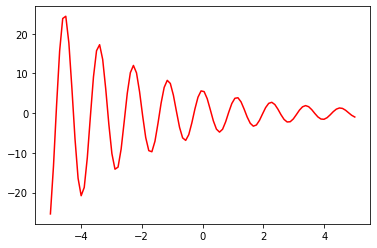

Inputs: [-9 -8 -7 -6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8  9]
Outputs: [102.66  70.92  22.63 -12.66 -25.38 -20.65  -8.94   1.16   5.91   5.74
   3.08   0.32  -1.27  -1.52  -0.98  -0.25   0.24   0.39   0.29]
___________________________

True Parameters -- (A,w,T2): (5.74, 5.55, 3.07)


In [98]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

inputs = []
outputs = []

# THIS GIVES THE DOMAIN
dom = np.linspace(-5,5,100)

# FUNCTION & PARAMETERS (RANDOMLY SELECTED)
A = np.random.uniform(3,6)
w = np.random.uniform(3,6)
T2 = np.random.uniform(3,6)
y = A*np.cos(w*dom)*(2.718**(-dom/T2))

# DEFINES EXPONENTIAL DECAY FUNCTION
def expDec(t, A, w, T2):
    return A*np.cos(w*t)*(2.718**(-t/T2))

# SETS UP FIGURE FOR PLOTTING
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# PLOTS THE FUNCTION
plt.plot(dom,y, 'r')

# SHOW THE PLOT
plt.show()

for i in range(-9, 10): 
    inputs.append(i)
    outputs.append(expDec(i, A, w, T2))
    
print("Inputs: "+ str(np.round(inputs,2)))
print("Outputs: "+ str(np.round(outputs,2)))
print("___________________________\n")
print("True Parameters -- (A,w,T2): ("+ str(np.round(A,2))+", "+str(np.round(w,2))+", "+str(np.round(T2,2))+")")

<h2><mark style = "background: #a1f5a5">Step 2</mark>: Import the data</h2>

For now, the data is just a .txt file in the GitHub repo. Alternatively, you can directly input the points into a pandas dataframe.

In [99]:
import pandas as pd

# GET DATA FROM GITHUB REPO OR ... 
# x = pd.read_csv('https://raw.githubusercontent.com/Refath/ExtractGraph/main/ExpDecay.txt')

# PUT IT DIRECTLY IN A PANDAS DATAFRAME
points = {'Input': inputs,
        'Output': outputs
        }

x = pd.DataFrame(points, columns = ['Input', 'Output'])

print(x)

    Input      Output
0      -9  102.657693
1      -8   70.915097
2      -7   22.630695
3      -6  -12.660060
4      -5  -25.382797
5      -4  -20.650464
6      -3   -8.940756
7      -2    1.163214
8      -1    5.907626
9       0    5.735483
10      1    3.078417
11      2    0.315856
12      3   -1.265079
13      4   -1.522607
14      5   -0.975241
15      6   -0.253468
16      7    0.236102
17      8    0.385527
18      9    0.290819


<h2><mark style = "background: #a1f5a5">Step 3</mark>: Define function and parameters</h2>

The three parameters in this case of an exponential decaying graph are $A$, $w$, and $T_2$

In [101]:
import numpy as np

# FUNCTION WHOSE PARAMETERS PROGRAM SHOULD BE GUESSING
def bpm(t, A, w, T2):
    return A*np.cos(w*t)*(2.718**(-t/T2))

<h2><mark style = "background: #a1f5a5">Step 4</mark>: Manual guess</h2>

The user's guess for each parameter is the array g = []. The for loop contains the inputs and $y$ is just an array of the outputs.

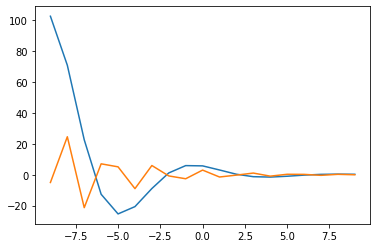

In [102]:
import matplotlib.pyplot as plt

# MANUAL GUESS
g = [3,4,3.5]

# CREATE ARRAY FOR OUTPUTS
n = len(x['Input'])
y = np.empty(n)

# TRY EVERY INPUT IN THE DOMAIN
for i in range(n):
    y[i] = bpm(x['Input'][i], g[0],g[1],g[2])

# PLOT IT ALL OUT
plt.plot(x['Input'], x['Output'])
plt.plot(x['Input'], y)

<h2><mark style = "background: #a1f5a5">Step 5</mark>: Best fit</h2>

Use the <mark>scipy.optimize curve_fit</mark> function to use nonlinear least squares (NLS) find the parameters which best fit the curve. 

Parameter Guess -- (A,w,T2): 5.74, 0.73, 3.07)


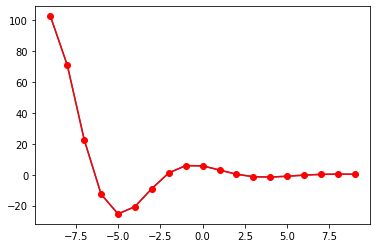

In [104]:
from scipy.optimize import curve_fit

# INPUT & OUTPUTS
t = x['Input'].values
hr = x['Output'].values

# USE SCIPY CURVE FIT TO USE NONLINEAR LEAST SQUARES TO FIND BEST PARAMETERS. TRY 1000 TIMES BEFORE STOPPING.
constants = curve_fit(bpm,t,hr, maxfev=1000)

# GET CONSTANTS FROM CURVE_FIT
A_fit = constants[0][0]
w_fit = constants[0][1]
T2_fit = constants[0][2]

# CREATE ARRAY TO HOLD FITTED OUTPUT
fit = []

# APPEND OUTPUT TO FIT=[] ARRAY
for i in range(-9,10):
    fit.append(bpm(i, A_fit, w_fit, T2_fit))

# STATES BEST PARAMETER GUESSES
print("Parameter Guess -- (A,w,T2): " + str(np.round(A_fit,2))+", "+str(np.round(w_fit,2))+", "+str(np.round(T2_fit,2))+")")

# PLOTS BEST PARAMETERS
plt.plot(x['Input'], x['Output'])
plt.plot(x['Input'], fit,"ro-")

<h2><mark style = "background: #a1f5a5">Step 5</mark>: Evaluate Accuracy using $R^2$ & $RMSE$</h2>

Use $R^2$ and $RMSE$ to evaluate the accuracy of SciPy's guess. The closer to 1, the better. 

In [107]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(hr, fit, squared=False)

print('R^2: ', r2_score(fit,hr))
print("RMSE: ", rms)

R^2:  1.0
RMSE:  2.692348363292285e-14
